# Homework 2
- Student: Aleksandra Kocot
 - [Git Hub page with the Homework questions](https://github.com/DataTalksClub/machine-learning-zoomcamp/blob/master/cohorts/2023/02-regression/homework.md)

In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-09-16 14:14:21--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8002::154, 2606:50c0:8000::154, 2606:50c0:8001::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8002::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: ‘housing.csv’

housing.csv         100%[===================>]   1,36M  2,24MB/s    in 0,6s    

2023-09-16 14:14:22 (2,24 MB/s) - ‘housing.csv’ saved [1423529/1423529]



In [2]:
!head housing.csv

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY
-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY


In [3]:
!wc -l housing.csv

20641 housing.csv


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df_raw = pd.read_csv("housing.csv")

In [5]:
df_raw

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### EDA

/home/olks/.pyenv/versions/mlzoomcamp2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/olks/.pyenv/versions/mlzoomcamp2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


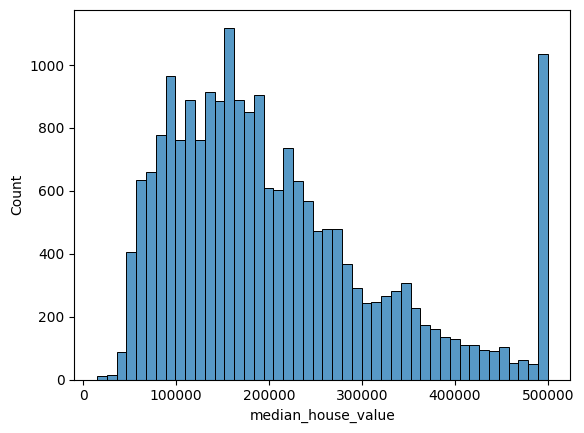

In [7]:
sns.histplot(df_raw["median_house_value"]);

/home/olks/.pyenv/versions/mlzoomcamp2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/olks/.pyenv/versions/mlzoomcamp2023/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


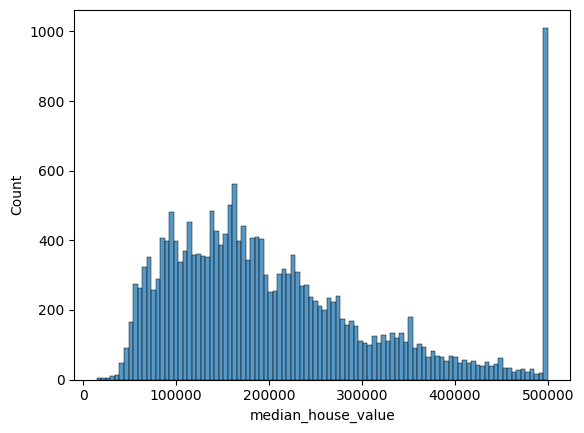

In [8]:
sns.histplot(df_raw["median_house_value"], bins=100);

- Data has a tail but it is not very long.
- There are many more elements in the highes values bin than in the all the other.

#### Data Preparation

In [9]:
df = df_raw[df_raw["ocean_proximity"].isin(['<1H OCEAN', 'INLAND'])].drop(columns="ocean_proximity")

## Question 1
There's one feature with missing values. What is it?

- total_rooms
- <b>total_bedrooms</b>
- population
- households

In [10]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [15]:
df.describe(percentiles=[.0, .25, .5, .75, .9, .95, .99, .1]).T

,count,mean,std,min,0%,10%,25%,50%,75%,90%,95%,99%,max
longitude,15687.0,-119.217442,1.780380,-124.1400,-124.1400,-121.900,-121.0700,-118.3700,-117.9900,-117.37000,-117.07000,-116.077200,-114.3100
latitude,15687.0,35.467307,2.066387,32.6100,32.6100,33.750,33.9400,34.1600,37.3400,38.59000,39.12000,40.570000,41.9500
housing_median_age,15687.0,27.188118,12.057128,1.0000,1.0000,11.000,17.0000,27.0000,36.0000,43.00000,48.00000,52.000000,52.0000
total_rooms,15687.0,2665.677312,2257.672743,2.0000,2.0000,937.000,1441.0000,2118.0000,3172.0000,4773.00000,6386.50000,11637.660000,39320.0000
total_bedrooms,15530.0,541.244688,435.650018,2.0000,2.0000,197.000,295.0000,432.0000,645.0000,976.00000,1300.00000,2292.710000,6445.0000
population,15687.0,1466.317205,1180.389908,3.0000,3.0000,519.000,802.0000,1195.0000,1777.0000,2654.40000,3426.70000,6015.080000,35682.0000
households,15687.0,500.916491,392.759399,2.0000,2.0000,182.600,278.0000,406.0000,602.0000,902.00000,1189.00000,2038.280000,6082.0000
median_income,15687.0,3.804019,1.857158,0.4999,0.4999,1.875,2.5208,3.4688,4.6862,6.08164,7.11438,10.358868,15.0001
median_house_value,15687.0,191943.020017,108801.077620,14999.0000,14999.0000,74800.000,111300.0000,166900.0000,241100.0000,347700.00000,440900.00000,500001.000000,500001.0000


## Question 2
What's the median (50% percentile) for variable 'population'?

- 995
- 1095
- <b>1195</b>
- 1295

In [12]:
df["population"].median()

1195.0

#### Prepare and split the dataset
Shuffle the initial dataset, use seed 42.<br>
Split your data in train/val/test sets, with 60%/20%/20% distribution.<br>
Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [7]:
np.random.seed(42)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [8]:
y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

## Question 3
We need to deal with missing values for the column from Q1.<br>
We have two options: fill it with 0 or with the mean of this variable.<br>
Try both options. For each, train a linear regression model without regularization using the code from the lessons.<br>
For computing the mean, use the training only!<br>
Use the validation dataset to evaluate the models and compare the RMSE of each option.<br>
Round the RMSE scores to 2 decimal digits using round(score, 2)<br>
Which option gives better RMSE?<br>
Options:
- With 0
- With mean
- <b>Both are equally good</b>

In [11]:
def prepare_X(df, fill=0):
    df_num = df[base]
    df_num = df_num.fillna(fill)
    X = df_num.values
    return X

In [12]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])

    # don't penalized on the intercept
    # reg[0,0] = 0
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [13]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [14]:
base = df_train.columns

#### Filling missing values with 0's

In [15]:
X_train = prepare_X(df_train)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

In [18]:
df_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
19963,-119.14,36.23,22.0,2935.0,523.0,1927.0,530.0,2.5875
5929,-117.79,34.12,16.0,2426.0,426.0,1319.0,446.0,4.8125
11377,-117.97,33.68,26.0,3653.0,568.0,1930.0,585.0,5.7301
6443,-118.03,34.10,32.0,2668.0,609.0,1512.0,541.0,2.9422
17546,-121.87,37.34,39.0,2479.0,541.0,1990.0,506.0,2.4306
...,...,...,...,...,...,...,...,...
20157,-119.15,34.44,33.0,2005.0,392.0,1043.0,351.0,5.3080
20005,-119.13,36.13,28.0,1673.0,385.0,1434.0,371.0,2.0586
6691,-118.08,34.13,46.0,1238.0,147.0,377.0,145.0,8.4546
3470,-118.46,34.29,24.0,3668.0,890.0,3151.0,810.0,3.0526


In [17]:
X_train[0]

array([-1.1914e+02,  3.6230e+01,  2.2000e+01,  2.9350e+03,  5.2300e+02,
        1.9270e+03,  5.3000e+02,  2.5875e+00])

In [19]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', round(rmse(y_val, y_pred),2))

validation: 0.34


#### Filling missing values with the mean

In [20]:
train_mean = df_train["total_bedrooms"].mean()
print("Mean number of total_bedrooms:",train_mean)
X_train = prepare_X(df_train, train_mean)
w_0, w = train_linear_regression_reg(X_train, y_train, r=0)

Mean number of total_bedrooms: 542.552956325786


In [21]:
X_val = prepare_X(df_val)
y_pred = w_0 + X_val.dot(w)
print('validation:', round(rmse(y_val, y_pred),2))

validation: 0.34


In [22]:
f"Missing values: {df_train.total_bedrooms.isna().sum()/len(df_train):%}"

'Missing values: 0.998619%'

Only less than 1% of rows has missing values so it may only makes a small difference how we fill them in.

## Question 4
Now let's train a regularized linear regression.<br>
For this question, fill the NAs with 0.<br>
Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].<br>
Use RMSE to evaluate the model on the validation dataset.<br>
Round the RMSE scores to 2 decimal digits.<br>
Which r gives the best RMSE?<br>
If there are multiple options, select the smallest r.<br>

Options:
- <b>0</b>
- 0.000001
- 0.001
- 0.0001

In [23]:
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)

In [24]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    print('%6s' %r, round(rmse(y_val, y_pred),4), w_0, w[0])

     0 0.3408 -9.76324947708778 -0.2559388020794665
 1e-06 0.3408 -9.763228830944234 -0.2559385740405668
0.0001 0.3408 -9.7611852355206 -0.255916002429005
 0.001 0.3409 -9.742646249322865 -0.2557112384013837
  0.01 0.3409 -9.56105619296396 -0.2537055667135632
   0.1 0.3413 -8.058889769044278 -0.23711402152503339
     1 0.3449 -3.133154278380411 -0.1827073985594345
     5 0.3477 -0.8410867973986649 -0.15738181739328883
    10 0.3483 -0.4381172315580547 -0.1529187322143991


## Question 5
We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.<br>
Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].<br>
For each seed, do the train/validation/test split with 60%/20%/20% distribution.<br>
Fill the missing values with 0 and train a model without regularization.<br>
For each seed, evaluate the model on the validation dataset and collect the RMSE scores.<br>
What's the standard deviation of all the scores? To compute the standard deviation, use np.std.<br>
Round the result to 3 decimal digits (round(std, 3))<br>
Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.<br>

What's the value of std?<br>

What's the value of std?
- 0.5
- 0.05
- <b>0.005</b>
- 0.0005

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

In [25]:
rmse_s = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)

    n = len(df)
    
    n_val = int(0.2 * n)
    n_test = int(0.2 * n)
    n_train = n - (n_val + n_test)
    
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_shuffled = df.iloc[idx]
    
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()

    y_train_orig = df_train.median_house_value.values
    y_val_orig = df_val.median_house_value.values
    y_test_orig = df_test.median_house_value.values
    
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    w_0, w = train_linear_regression_reg(X_train, y_train, r=0)
    y_pred = w_0 + X_val.dot(w)
    RMSerror = rmse(y_val, y_pred)
    print('%6s' %s, round(RMSerror,2))
    rmse_s.append(RMSerror)    
print('Standard deviation of RMSE\'s:', round(np.std(rmse_s),3))

     0 0.34
     1 0.34
     2 0.34
     3 0.33
     4 0.34
     5 0.34
     6 0.34
     7 0.35
     8 0.35
     9 0.33
Standard deviation of RMSE's: 0.005


## Question 6
Split the dataset like previously, use seed 9.<br>
Combine train and validation datasets.<br>
Fill the missing values with 0 and train a model with r=0.001.<br>
What's the RMSE on the test dataset?<br>

Options:
- 0.13
- 0.23
- <b>0.33</b>
- 0.43

In [26]:
seed = 9
np.random.seed(seed)

n = len(df)

n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)

idx = np.arange(n)
np.random.shuffle(idx)

df_shuffled = df.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

y_train_orig = df_train.median_house_value.values
y_val_orig = df_val.median_house_value.values
y_test_orig = df_test.median_house_value.values

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

df_full_train = pd.concat([df_train,df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])
X_test = prepare_X(df_test)
w_0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)
y_pred_test = w_0 + X_test.dot(w)
print("Validation RMSE:", round(rmse(y_test, y_pred_test),2))

Validation RMSE: 0.33
